In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/wine.csv")
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

## **Q1. Finding unique valuesin all the columns**

In [ ]:
def findUnique(col):
  print("The number of unique values are "+ str(df[col].nunique()))
  print("The unique values are :")
  print( df[col].unique())

In [ ]:
# unique for fixed acidity
findUnique('fixed acidity')

The number of unique values are 96
The unique values are :
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]


In [ ]:
# unique for volatile acidity
findUnique('volatile acidity')

The number of unique values are 143
The unique values are :
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  0.2   0.36  0.83  0.46  0.47  0.77  0.815 0.795 0.665 0.765 0.24
 0.85  0.84  0.96  0.78  0.23  0.315 0.365 0.25  0.825 0.72  0.595 0.585
 0.915 0.755 0.845 1.24  0.8   0.98  1.185 0.92  1.035 1.025 0.565 0.74
 1.115 0.865 0.875 0.965 0.91  0.89  1.01  0.305 0.395 0.12  0.86  0.295
 1.005 0.19  0.955 0.16  1.58  0.79  1.18  0.475 0.81  0.895 0.855]


In [ ]:
# unique for citric acid
findUnique('citric acid')

The number of unique values are 80
The unique values are :
[0.   0.04 0.56 0.06 0.02 0.36 0.08 0.29 0.18 0.19 0.28 0.51 0.48 0.31
 0.21 0.11 0.14 0.16 0.24 0.07 0.12 0.25 0.09 0.3  0.2  0.22 0.15 0.43
 0.52 0.23 0.37 0.26 0.57 0.4  0.49 0.05 0.54 0.64 0.7  0.47 0.44 0.17
 0.68 0.53 0.1  0.01 0.55 1.   0.03 0.42 0.33 0.32 0.35 0.6  0.74 0.58
 0.5  0.76 0.46 0.45 0.38 0.39 0.66 0.62 0.67 0.79 0.63 0.61 0.71 0.65
 0.59 0.34 0.69 0.73 0.72 0.41 0.27 0.75 0.13 0.78]


In [ ]:
# unique for residual sugar
findUnique('residual sugar')

The number of unique values are 91
The unique values are :
[ 1.9   2.6   2.3   1.8   1.6   1.2   2.    6.1   3.8   3.9   1.7   4.4
  2.4   1.4   2.5  10.7   5.5   2.1   1.5   5.9   2.8   2.2   3.    3.4
  5.1   4.65  1.3   7.3   7.2   2.9   2.7   5.6   3.1   3.2   3.3   3.6
  4.    7.    6.4   3.5  11.    3.65  4.5   4.8   2.95  5.8   6.2   4.2
  7.9   3.7   6.7   6.6   2.15  5.2   2.55 15.5   4.1   8.3   6.55  4.6
  4.3   5.15  6.3   6.    8.6   7.5   2.25  4.25  2.85  3.45  2.35  2.65
  9.    8.8   5.    1.65  2.05  0.9   8.9   8.1   4.7   1.75  7.8  12.9
 13.4   5.4  15.4   3.75 13.8   5.7  13.9 ]


In [ ]:
# unique for chlorides
findUnique('chlorides')

The number of unique values are 153
The unique values are :
[0.076 0.098 0.092 0.075 0.069 0.065 0.073 0.071 0.097 0.089 0.114 0.176
 0.17  0.368 0.086 0.341 0.077 0.082 0.106 0.084 0.085 0.08  0.105 0.083
 0.103 0.066 0.172 0.074 0.088 0.332 0.05  0.054 0.113 0.068 0.081 0.11
 0.07  0.111 0.079 0.115 0.094 0.093 0.104 0.464 0.401 0.062 0.107 0.045
 0.058 0.102 0.467 0.091 0.122 0.09  0.119 0.178 0.146 0.072 0.118 0.049
 0.06  0.117 0.087 0.236 0.61  0.095 0.1   0.36  0.067 0.27  0.099 0.046
 0.061 0.056 0.039 0.059 0.101 0.057 0.337 0.078 0.263 0.063 0.611 0.064
 0.096 0.358 0.343 0.186 0.112 0.213 0.214 0.121 0.128 0.052 0.12  0.116
 0.109 0.159 0.124 0.174 0.047 0.127 0.413 0.152 0.053 0.055 0.051 0.125
 0.2   0.171 0.226 0.25  0.108 0.148 0.143 0.222 0.157 0.422 0.034 0.387
 0.415 0.243 0.241 0.19  0.132 0.126 0.038 0.044 0.041 0.165 0.048 0.145
 0.147 0.012 0.194 0.161 0.123 0.414 0.216 0.043 0.042 0.369 0.166 0.136
 0.403 0.137 0.168 0.153 0.267 0.169 0.205 0.235 0.23 ]


In [ ]:
# unique for free sulfur dioxide
findUnique('free sulfur dioxide')

The number of unique values are 60
The unique values are :
[11.  25.  15.  17.  13.   9.  16.  52.  51.  35.   6.  29.  23.  10.
 21.   4.  14.   8.  22.  40.   5.   3.   7.  12.  30.  33.  50.  19.
 20.  27.  18.  28.  34.  42.  41.  37.  32.  36.  24.  26.  39.  40.5
 68.  31.  38.  43.  47.   1.  54.  46.  45.   2.   5.5 53.  37.5 57.
 48.  72.  55.  66. ]


In [ ]:
# unique for total sulfur dioxide
findUnique('total sulfur dioxide')

The number of unique values are 144
The unique values are :
[ 34.   67.   54.   60.   40.   59.   21.   18.  102.   65.   29.  145.
 148.  103.   56.   71.   37.   23.   11.   35.   16.   82.  113.   83.
  50.   15.   30.   19.   87.   46.   14.  114.   12.   96.  119.   73.
  45.   10.  110.   52.  112.   39.   27.   94.   43.   42.   80.   51.
  61.  136.   31.  125.   24.  140.  133.   85.  106.   22.   36.   69.
  64.  153.   47.  108.  111.   62.   28.   89.   13.   90.  134.   99.
  26.   63.  105.   20.  141.   88.  129.  128.   86.  121.  101.   44.
   8.   49.   38.  143.  144.  127.  126.  120.   55.   93.   95.   41.
  58.   72.   81.  109.   33.   53.   98.   48.   70.   25.  135.   92.
  74.   32.   77.  165.   75.  124.   78.  122.   66.   68.   17.   91.
  76.  151.  142.  116.  149.   57.  104.   84.  147.  155.  152.    9.
 139.  130.    7.  100.  115.    6.   79.  278.  289.  160.   77.5 131. ]


In [ ]:
# unique for density
findUnique('density')

The number of unique values are 436
The unique values are :
[0.9978  0.9968  0.997   0.998   0.9964  0.9946  0.9959  0.9943  0.9974
 0.9986  0.9969  0.9982  0.9966  0.9955  0.9962  0.9972  0.9958  0.9993
 0.9957  0.9975  0.994   0.9976  0.9934  0.9954  0.9971  0.9956  0.9983
 0.9967  0.9961  0.9984  0.9938  0.9932  0.9965  0.9963  0.996   0.9973
 0.9988  0.9937  0.9952  0.9916  0.9944  0.9996  0.995   0.9981  0.9953
 0.9924  0.9948  0.99695 0.99545 0.99615 0.9994  0.99625 0.99585 0.99685
 0.99655 0.99525 0.99815 0.99745 0.9927  0.99675 0.99925 0.99565 1.00005
 0.9985  0.99965 0.99575 0.9999  1.00025 0.9987  0.99935 0.99735 0.99915
 0.9991  1.00015 0.9997  1.001   0.9979  1.0014  1.0001  0.99855 0.99845
 0.9998  0.99645 0.99865 0.9989  0.99975 0.999   1.0015  1.0002  0.9992
 1.0008  1.      1.0006  1.0004  1.0018  0.9912  1.0022  1.0003  0.9949
 0.9951  1.0032  0.9947  0.9995  0.9977  1.0026  1.00315 1.0021  0.9917
 0.9922  0.9921  0.99788 1.00024 0.99768 0.99782 0.99761 0.99803 0.99785

In [ ]:
# unique for pH
findUnique('pH')

The number of unique values are 89
The unique values are :
[3.51 3.2  3.26 3.16 3.3  3.39 3.36 3.35 3.28 3.58 3.17 3.11 3.38 3.04
 3.52 3.43 3.34 3.47 3.46 3.45 3.4  3.42 3.23 3.5  3.33 3.21 3.48 3.9
 3.25 3.32 3.15 3.41 3.44 3.31 3.54 3.13 2.93 3.14 3.75 3.85 3.29 3.08
 3.37 3.19 3.07 3.49 3.53 3.24 3.63 3.22 3.68 2.74 3.59 3.   3.12 3.57
 3.61 3.06 3.6  3.69 3.1  3.05 3.67 3.27 3.18 3.02 3.55 2.99 3.01 3.56
 3.03 3.62 2.88 2.95 2.98 3.09 2.86 3.74 2.92 3.72 2.87 2.89 2.94 3.66
 3.71 3.78 3.7  4.01 2.9 ]


In [ ]:
# unique for sulpahtes
findUnique('sulphates')

The number of unique values are 96
The unique values are :
[0.56 0.68 0.65 0.58 0.46 0.47 0.57 0.8  0.54 0.52 1.56 0.88 0.93 0.75
 1.28 0.5  1.08 0.53 0.91 0.63 0.59 0.55 0.66 0.6  0.73 0.48 0.83 0.51
 0.9  1.2  0.74 0.64 0.77 0.71 0.62 0.39 0.79 0.95 0.82 1.12 1.14 0.78
 1.95 1.22 1.98 0.61 1.31 0.69 0.67 0.7  0.49 0.92 2.   0.72 1.59 0.33
 1.02 0.97 0.85 0.43 1.03 0.86 0.76 1.61 1.09 0.84 0.96 0.45 1.26 0.87
 0.81 1.   1.36 1.18 0.89 0.98 1.13 1.04 1.11 0.99 1.07 0.44 1.06 1.05
 0.42 1.17 1.62 0.94 1.34 1.16 1.1  0.4  1.15 0.37 1.33 1.01]


In [ ]:
# unique for alcohol
findUnique('alcohol')

The number of unique values are 65
The unique values are :
[ 9.4         9.8        10.          9.5        10.5         9.2
  9.9         9.1         9.3         9.          9.7        10.1
 10.6         9.6        10.8        10.3        13.1        10.2
 10.9        10.7        12.9        10.4        13.         14.
 11.5        11.4        12.4        11.         12.2        12.8
 12.6        12.5        11.7        11.3        12.3        12.
 11.9        11.8         8.7        13.3        11.2        11.6
 11.1        13.4        12.1         8.4        12.7        14.9
 13.2        13.6        13.5        10.03333333  9.55        8.5
 11.06666667  9.56666667 10.55        8.8        13.56666667 11.95
  9.95        9.23333333  9.25        9.05       10.75      ]


## **Q2. Finding missing values**

From the result we can see that there are no missing values

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#for col in dn.columns:
    #dn[col].fillna(dn[col].mean(), inplace=True)

#for col in df.columns:
#    if df[col].dtypes == 'object':
#        print(df[col].fillna('i am Nan', inplace=True))

## **Q4. Normalising the data using normal scaler or minmax scaler**

In [ ]:
ds = df.copy()
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
ds['quality'].replace(['good', 'bad'],[0, 1], inplace=True)

In [ ]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
# get the numerical data alone
# just double checking to take only numerical data
dn = ds._get_numeric_data()
dn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
  scaler = MinMaxScaler()
  # transform data
  scaled = scaler.fit_transform(dn)
  print(scaled)

[[0.24778761 0.39726027 0.         ... 0.13772455 0.15384615 1.        ]
 [0.28318584 0.52054795 0.         ... 0.20958084 0.21538462 1.        ]
 [0.28318584 0.43835616 0.04       ... 0.19161677 0.21538462 1.        ]
 ...
 [0.15044248 0.26712329 0.13       ... 0.25149701 0.4        0.        ]
 [0.11504425 0.35958904 0.12       ... 0.22754491 0.27692308 1.        ]
 [0.12389381 0.13013699 0.47       ... 0.19760479 0.4        0.        ]]


In [ ]:
dn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [ ]:
print(dn['fixed acidity'].min())
print(dn['fixed acidity'].max())

4.6
15.9


In [ ]:
# min max scaler
X_copy = dn.copy() 
scaler = MinMaxScaler()
X_columns = dn.columns
trans_formed_min_max = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
trans_formed_min_max.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,1.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,1.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0


In [ ]:
trans_formed_min_max.to_csv("minwine.csv")

In [ ]:
# standard scaler  
scaler = StandardScaler()
X_copy = dn.copy() 
scaler = MinMaxScaler()
X_columns = dn.columns
trans_formed_standard = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
trans_formed_standard.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,1.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,1.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0


In [ ]:
trans_formed_standard.to_csv("standard.csv")

**Apply KNN for the preprocessed dataset use 5 different K Values and 3 different
distance measures**

In [ ]:
trans_formed_min_max.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,1.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,1.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,1.0


In [ ]:
def knnValue(kValue, metricccc):
    knn = KNeighborsClassifier(n_neighbors=kValue, metric = metricccc)
  
    numRows = trans_formed_min_max.shape[0]
    trainSize = round(numRows * 0.6) 
  # divide train and test dataset
    train = trans_formed_min_max.iloc[:trainSize, : ]
    test = trans_formed_min_max.iloc[trainSize : , :]

    x_cols = ["fixed acidity", "volatile acidity","citric acid" , "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 'sulphates', 'alcohol']
    y_col = ["quality"]

    knn.fit(train[x_cols], train[y_col])
    print("Train score "+str(knn.score(train[x_cols], train[y_col])))
    print("Test score "+str(knn.score(test[x_cols], test[y_col])))
    return (knn.score(test[x_cols], test[y_col]))

In [ ]:
x_minKowski = []
y_minKowski = []

x_euclidean = []
y_euclidean = []

x_manhattan = []
y_manhattan = []

In [ ]:
y_minKowski.append(knnValue(2, 'minkowski'))
x_minKowski.append(2)

Train score 0.8884254431699687
Test score 0.671875


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#knnValue(3, 'minkowski')
y_minKowski.append(knnValue(3, 'minkowski'))
x_minKowski.append(3)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8644421272158499
Test score 0.678125


In [ ]:
#knnValue(4, 'minkowski')
y_minKowski.append(knnValue(4, 'minkowski'))
x_minKowski.append(4)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8123044838373306
Test score 0.7


In [ ]:
#knnValue(5, 'minkowski')
y_minKowski.append(knnValue(5, 'minkowski'))
x_minKowski.append(5)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8102189781021898
Test score 0.6921875


In [ ]:
#knnValue(2, 'euclidean')
y_euclidean.append(knnValue(2, 'euclidean'))
x_euclidean.append(2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8884254431699687
Test score 0.671875


In [ ]:
#knnValue(3, 'euclidean')
y_euclidean.append(knnValue(3, 'euclidean'))
x_euclidean.append(3)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8644421272158499
Test score 0.678125


In [ ]:
#knnValue(4, 'euclidean')
y_euclidean.append(knnValue(4, 'euclidean'))
x_euclidean.append(4)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8123044838373306
Test score 0.7


In [ ]:
#knnValue(5, 'euclidean')
y_euclidean.append(knnValue(5, 'euclidean'))
x_euclidean.append(5)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8102189781021898
Test score 0.6921875


In [ ]:
#knnValue(6, 'euclidean')
y_euclidean.append(knnValue(6, 'euclidean'))
x_euclidean.append(6)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.781021897810219
Test score 0.7140625


In [ ]:
#knnValue(2, 'manhattan')
y_manhattan.append(knnValue(2, 'manhattan'))
x_manhattan.append(2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.8894681960375391
Test score 0.6453125


In [ ]:
#knnValue(3, 'manhattan')
y_manhattan.append(knnValue(3, 'manhattan'))
x_manhattan.append(3)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.867570385818561
Test score 0.6671875


In [ ]:
#knnValue(4, 'manhattan')
y_manhattan.append(knnValue(4, 'manhattan'))
x_manhattan.append(4)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.835245046923879
Test score 0.70625


In [ ]:
#knnValue(5, 'manhattan')
y_manhattan.append(knnValue(5, 'manhattan'))
x_manhattan.append(5)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.808133472367049
Test score 0.703125


In [ ]:
#knnValue(6, 'manhattan')
y_manhattan.append(knnValue(6, 'manhattan'))
x_manhattan.append(6)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score 0.7924921793534933
Test score 0.6875


# **Plottting the test score**

In [ ]:
#minkowski
print("MinKowski x axis"+ str(x_minKowski))
print("MinKowski y axis"+ str(y_minKowski))
#manhattan
print("manhattan x axis"+ str(x_manhattan))
print("manhattan y axis"+ str(y_manhattan))
#euclidean
print("euclidean x axis"+ str(x_euclidean))
print("euclidean y axis"+ str(y_euclidean))

MinKowski x axis[2, 3, 4, 5]
MinKowski y axis[0.671875, 0.678125, 0.7, 0.6921875]
manhattan x axis[2, 3, 4, 5, 6]
manhattan y axis[0.6453125, 0.6671875, 0.70625, 0.703125, 0.6875]
euclidean x axis[2, 3, 4, 5, 6]
euclidean y axis[0.671875, 0.678125, 0.7, 0.6921875, 0.7140625]


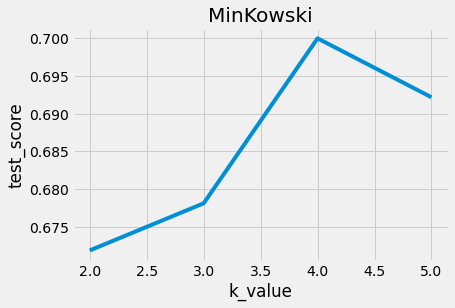

In [ ]:
plt.plot(x_minKowski, y_minKowski)
plt.xlabel("k_value")
plt.ylabel("test_score")
plt.title("MinKowski")
plt.plot()
plt.show()

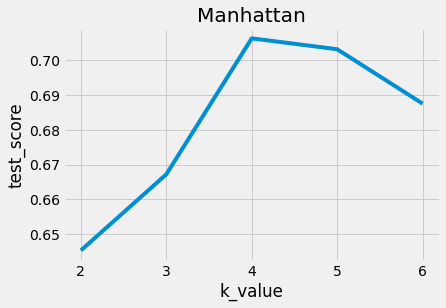

In [ ]:
plt.plot(x_manhattan, y_manhattan)
plt.xlabel("k_value")
plt.ylabel("test_score")
plt.title("Manhattan")
plt.plot()
plt.show()

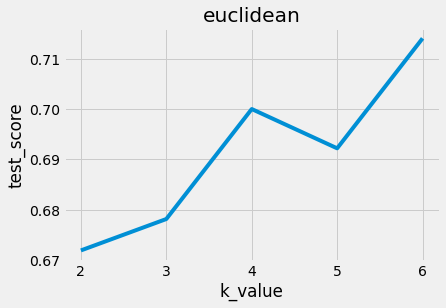

In [ ]:
plt.plot(x_euclidean, y_euclidean)
plt.xlabel("k_value")
plt.ylabel("test_score")
plt.title("euclidean")
plt.plot()
plt.show()

## **6. Display the confusion matrix, accuracy measures, classification report.**

In [ ]:
def confusionMatrix(kValue, metricccc):
    knn = KNeighborsClassifier(n_neighbors=kValue, metric = metricccc)
  
    numRows = trans_formed_min_max.shape[0]
    trainSize = round(numRows * 0.6) 
    # divide train and test dataset
    train = trans_formed_min_max.iloc[:trainSize, : ]
    test = trans_formed_min_max.iloc[trainSize : , :]

    x_cols = ["fixed acidity", "volatile acidity","citric acid" , "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 'sulphates', 'alcohol']
    y_col = ["quality"]

    knn.fit(train[x_cols], train[y_col])
  
    y_pred = knn.predict(test[x_cols])
    print(classification_report(test[y_col], y_pred))
    print(confusion_matrix(test[y_col],y_pred))
    print('\n__________________________________________________________________________________\n')
    print("Accuracy score:\n")
    print(metrics.accuracy_score(test[y_col], y_pred))

In [ ]:
methods_met = ['minkowski', 'euclidean', 'manhattan']

In [ ]:
for met in methods_met:
    for i in range(2, 8):
        print('\n*********************************************************************************\n')
        print("\nThe Score of "+met+" with k value of "+str(i)+" is: ")
        print('\n__________________________________________________________________________________\n')
        print(confusionMatrix(i, met))
        print('\n**********************************************************************************\n\n\n')


*********************************************************************************


The Score of minkowski with k value of 2 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75       383
         1.0       0.64      0.42      0.51       257

    accuracy                           0.67       640
   macro avg       0.66      0.63      0.63       640
weighted avg       0.67      0.67      0.65       640

[[322  61]
 [149 108]]

__________________________________________________________________________________

Accuracy score:

0.671875
None

**********************************************************************************




*********************************************************************************


The Score of minkowski with k value of 3 is: 

__________________________________________________________________________________

              p

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[[290  93]
 [104 153]]

__________________________________________________________________________________

Accuracy score:

0.6921875
None

**********************************************************************************




*********************************************************************************


The Score of minkowski with k value of 6 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       383
         1.0       0.69      0.53      0.60       257

    accuracy                           0.71       640
   macro avg       0.71      0.68      0.69       640
weighted avg       0.71      0.71      0.71       640

[[322  61]
 [122 135]]

__________________________________________________________________________________

Accuracy score:

0.7140625
None

**********************************************************************************




**

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[[272 111]
 [ 95 162]]

__________________________________________________________________________________

Accuracy score:

0.678125
None

**********************************************************************************




*********************************************************************************


The Score of euclidean with k value of 4 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       383
         1.0       0.68      0.48      0.56       257

    accuracy                           0.70       640
   macro avg       0.69      0.66      0.67       640
weighted avg       0.70      0.70      0.69       640

[[324  59]
 [133 124]]

__________________________________________________________________________________

Accuracy score:

0.7
None

**********************************************************************************




*********

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       383
         1.0       0.64      0.61      0.63       257

    accuracy                           0.71       640
   macro avg       0.70      0.69      0.69       640
weighted avg       0.71      0.71      0.71       640

[[296  87]
 [100 157]]

__________________________________________________________________________________

Accuracy score:

0.7078125
None

**********************************************************************************




*********************************************************************************


The Score of manhattan with k value of 2 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       383
         1.0       0.59      0.38      0.46       257

    accuracy                           0.65       640
   macro avg

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75       383
         1.0       0.63      0.63      0.63       257

    accuracy                           0.70       640
   macro avg       0.69      0.69      0.69       640
weighted avg       0.70      0.70      0.70       640

[[288  95]
 [ 95 162]]

__________________________________________________________________________________

Accuracy score:

0.703125
None

**********************************************************************************




*********************************************************************************


The Score of manhattan with k value of 6 is: 

__________________________________________________________________________________

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       383
         1.0       0.64      0.52      0.57       257

    accuracy                           0.69       640
   macro avg 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
confusionMatrix(3, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.73       383
         1.0       0.59      0.63      0.61       257

    accuracy                           0.68       640
   macro avg       0.67      0.67      0.67       640
weighted avg       0.68      0.68      0.68       640

[[272 111]
 [ 95 162]]

__________________________________________________________________________________

Accuracy score:

0.678125


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
confusionMatrix(4, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       383
         1.0       0.68      0.48      0.56       257

    accuracy                           0.70       640
   macro avg       0.69      0.66      0.67       640
weighted avg       0.70      0.70      0.69       640

[[324  59]
 [133 124]]

__________________________________________________________________________________

Accuracy score:

0.7


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
confusionMatrix(5, 'minkowski')

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       383
         1.0       0.62      0.60      0.61       257

    accuracy                           0.69       640
   macro avg       0.68      0.68      0.68       640
weighted avg       0.69      0.69      0.69       640

[[290  93]
 [104 153]]

__________________________________________________________________________________

Accuracy score:

0.6921875


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
confusionMatrix(6, 'minkowski')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78       383
         1.0       0.69      0.53      0.60       257

    accuracy                           0.71       640
   macro avg       0.71      0.68      0.69       640
weighted avg       0.71      0.71      0.71       640

[[322  61]
 [122 135]]

__________________________________________________________________________________

Accuracy score:

0.7140625


## **Apply Naïve Bayes Classification of the same dataset and compare using the results found.**

In [ ]:
def naiv():
    # instantiate the model
    gnb = GaussianNB()
    numRows = trans_formed_min_max.shape[0]
    trainSize = round(numRows * 0.6) 
    # divide train and test dataset
    train = trans_formed_min_max.iloc[:trainSize, : ]
    test = trans_formed_min_max.iloc[trainSize : , :]
    x_cols = ["fixed acidity", "volatile acidity","citric acid" , "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", 'sulphates', 'alcohol']
    y_col = ["quality"]
    # fit the model
    gnb.fit(train[x_cols], train[y_col])
    y_pred = gnb.predict(test[x_cols])

    print(y_pred)
  
    print('\n\nModel accuracy score: {0:0.4f}\n\n'. format(accuracy_score(test[y_col], y_pred)))

In [ ]:
naiv()

[1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **performance of K-Means clustering algorithm**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def kMeanFun(col1, col2):
    kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
    numRows = trans_formed_min_max.shape[0]
    trainSize = round(numRows * 0.8) 
    # divide train and test dataset
    train = trans_formed_min_max.iloc[:trainSize, : ]
    test = trans_formed_min_max.iloc[trainSize : , :]
    x_cols = [col1]
    y_col = [col2]
    kmeans.fit(train[x_cols], train[y_col])
    print("The Lowest SSE Value is:\n\t"+str(kmeans.inertia_))
    print("\n----------------------------------------------------------\n")
    print("\n\nThe Location of the Centroid:\n\t"+str(kmeans.cluster_centers_))
    print("\n----------------------------------------------------------\n")
    print("\nIterations required to converge:\n\t"+str(kmeans.n_iter_))
    print("\n----------------------------------------------------------\n")
    print("\nLabels:\n\t"+str(kmeans.labels_[:5]))
    print("\n----------------------------------------------------------\n")   
    print("Ploting of the kMeans")
    sse1 = []
    kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(trans_formed_min_max)
        sse1.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.plot(sse1)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    print("\n----------------------------------------------------------\n")
    print("Ploting of scatter plot")
    plt.scatter(trans_formed_min_max[col2], trans_formed_min_max[col1], c ="blue")
    # To show the plot
    plt.show()

The Lowest SSE Value is:
	5.79945144103638

----------------------------------------------------------



The Location of the Centroid:
	[[0.62372197]
 [0.22756833]
 [0.39524193]]

----------------------------------------------------------


Iterations required to converge:
	5

----------------------------------------------------------


Labels:
	[1 1 1 0 1]

----------------------------------------------------------

Ploting of the kMeans


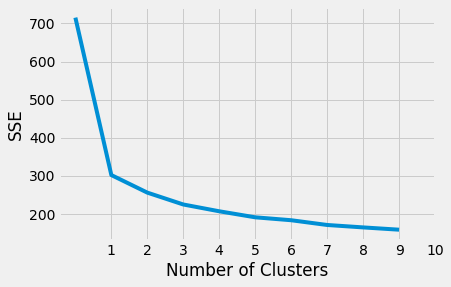


----------------------------------------------------------

Ploting of scatter plot


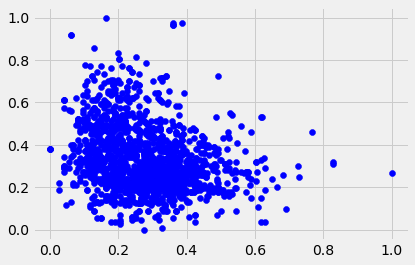

In [ ]:
# kmeans for fixed acidity and volatile acidity
kMeanFun('fixed acidity', 'volatile acidity')

In [ ]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


The Lowest SSE Value is:
	3.552483744428873

----------------------------------------------------------



The Location of the Centroid:
	[[0.16486841]
 [0.50162966]
 [0.32107354]]

----------------------------------------------------------


Iterations required to converge:
	10

----------------------------------------------------------


Labels:
	[2 1 1 0 2]

----------------------------------------------------------

Ploting of the kMeans


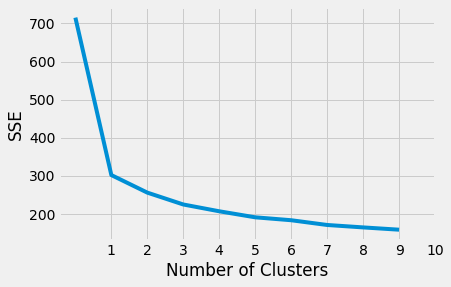


----------------------------------------------------------

Ploting of scatter plot


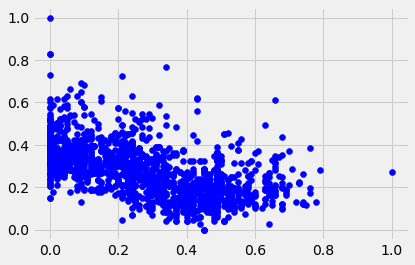

In [ ]:
# kmeans for Quantity and Rating
kMeanFun('volatile acidity', 'citric acid')

The Lowest SSE Value is:
	6.299129005556265

----------------------------------------------------------



The Location of the Centroid:
	[[0.0547013 ]
 [0.27626068]
 [0.51539906]]

----------------------------------------------------------


Iterations required to converge:
	3

----------------------------------------------------------


Labels:
	[0 0 0 2 0]

----------------------------------------------------------

Ploting of the kMeans


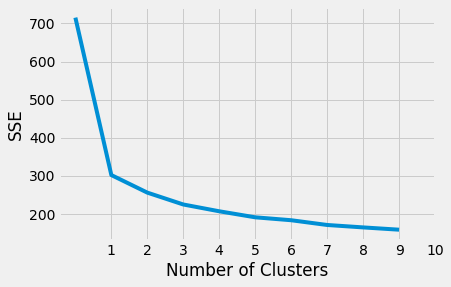


----------------------------------------------------------

Ploting of scatter plot


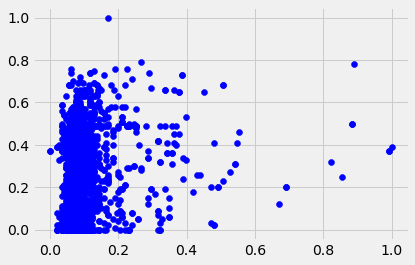

In [ ]:
# kmeans for citric acid and residual sugar
kMeanFun('citric acid', 'residual sugar')